In [1]:
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
from matplotlib import pyplot as plt
from statsmodels.stats.outliers_influence import variance_inflation_factor
import scipy.stats as stats

In [2]:
Super_Lig = pd.read_csv("Super_Lig.csv")

In [3]:
Super_Lig.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113 entries, 0 to 112
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RANK    113 non-null    int64  
 1   TEAM    113 non-null    object 
 2   W       113 non-null    int64  
 3   D       113 non-null    int64  
 4   L       113 non-null    int64  
 5   GF      113 non-null    int64  
 6   GA      113 non-null    int64  
 7   PTS     113 non-null    int64  
 8   PL      113 non-null    int64  
 9   AGE     113 non-null    float64
 10  POSS    113 non-null    float64
 11  SEASON  113 non-null    int64  
 12  ATT     53 non-null     object 
 13  LEAGUE  113 non-null    object 
dtypes: float64(2), int64(9), object(3)
memory usage: 12.5+ KB


In [4]:
Super_Lig.head()

,RANK,TEAM,W,D,L,GF,GA,PTS,PL,AGE,POSS,SEASON,ATT,LEAGUE
0,9,Adana Demirspor,15,10,13,60,47,55,34,27.6,48.8,2022,NaN,SUPER LIG
1,5,Alanyaspor,19,7,12,67,58,64,32,28.8,53.6,2022,NaN,SUPER LIG
2,18,Altay,9,7,22,39,57,34,30,28.4,44.1,2022,NaN,SUPER LIG
3,7,Antalyaspor,16,11,11,54,47,59,31,29.3,48.9,2022,NaN,SUPER LIG
4,4,Başakşehir,19,8,11,56,36,65,33,29.2,56.2,2022,NaN,SUPER LIG


In [5]:
Super_Lig.tail()

,RANK,TEAM,W,D,L,GF,GA,PTS,PL,AGE,POSS,SEASON,ATT,LEAGUE
108,15,Kayserispor,10,8,16,47,58,38,33,26.9,49.8,2017,"5,524",SUPER LIG
109,9,Konyaspor,11,10,13,40,45,43,26,27.0,50.4,2017,"15,723",SUPER LIG
110,13,Osmanlıspor,9,11,14,37,45,38,29,28.5,52.5,2017,"3,792",SUPER LIG
111,16,Rizespor,10,6,18,44,53,36,26,24.9,44.4,2017,"3,369",SUPER LIG
112,6,Trabzonspor,14,9,11,39,34,51,28,27.0,52.2,2017,"17,252",SUPER LIG


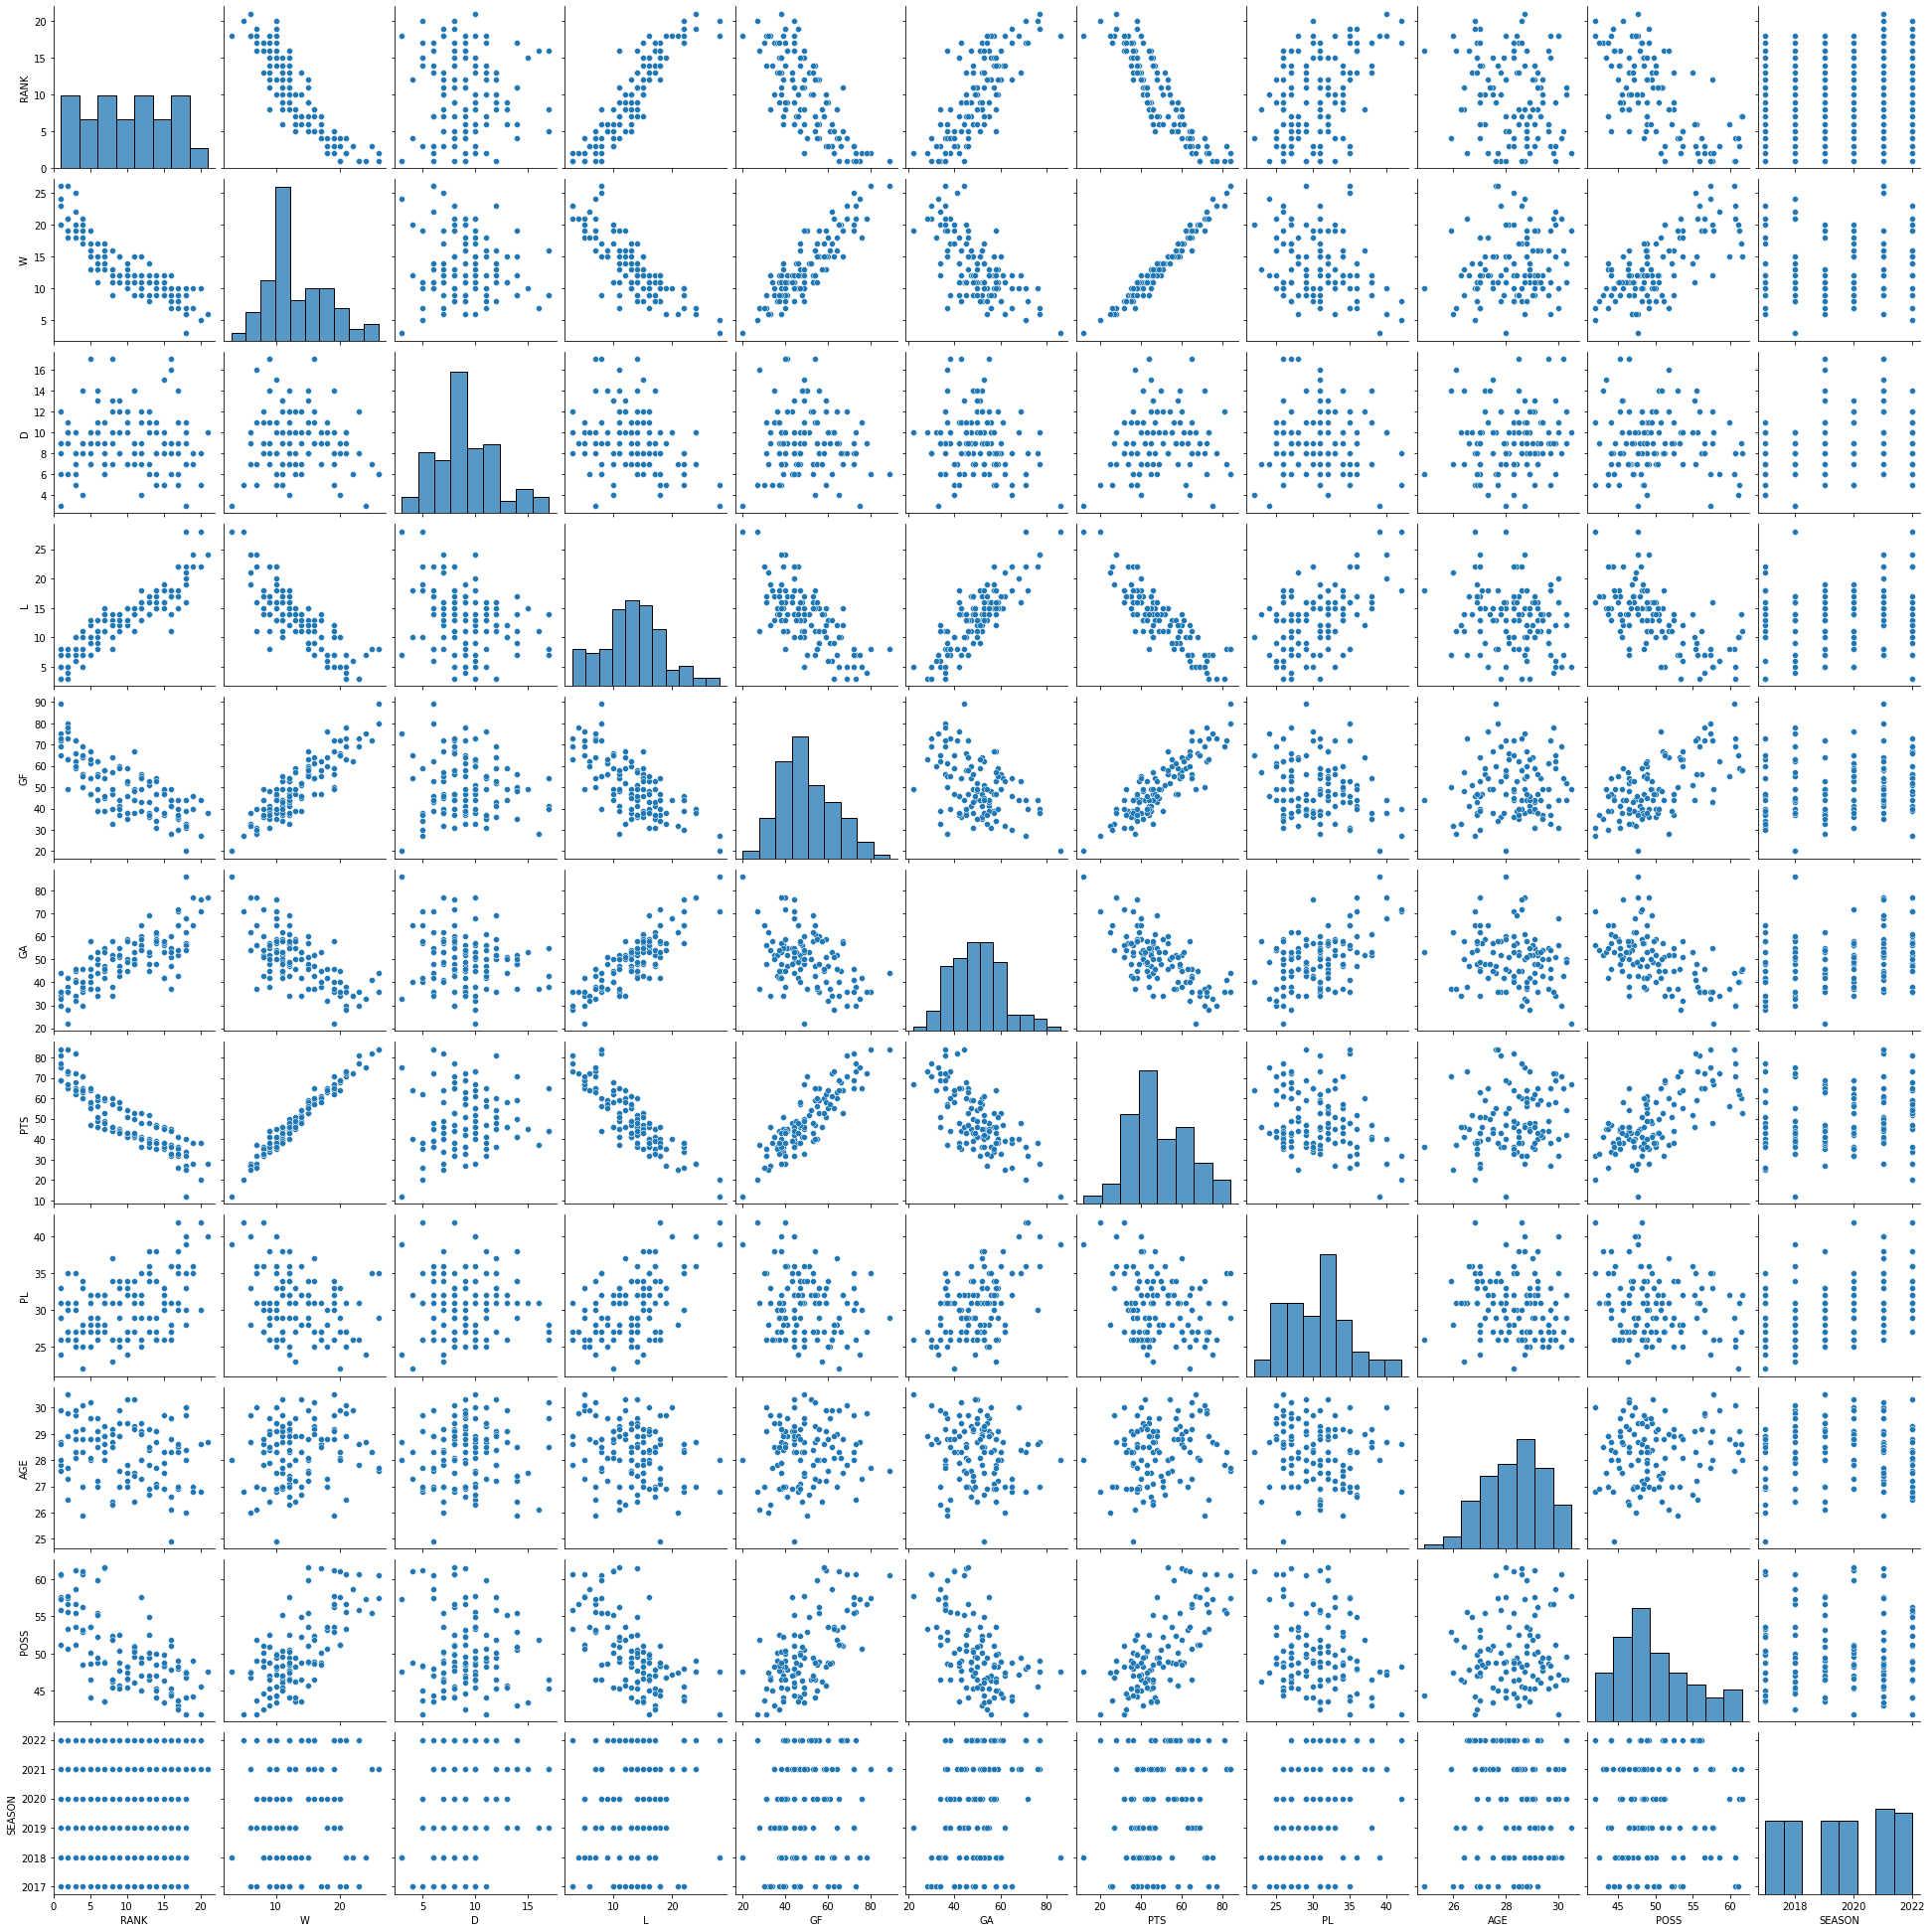

In [6]:
sns.pairplot(Super_Lig);

In [7]:
x = Super_Lig.drop(columns = ['TEAM','D','PL','SEASON','ATT','LEAGUE','POSS','AGE'])
x = sm.add_constant(x)
y = Super_Lig['POSS']
model = sm.OLS(y,x, data = Super_Lig)
Super_Lig_model = model.fit()
Super_Lig_model.summary()

/home/dyedbird/anaconda3/envs/classification/lib/python3.8/site-packages/statsmodels/base/model.py:127: ValueWarning: unknown kwargs ['data']
  warnings.warn(msg, ValueWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   POSS   R-squared:                       0.512
Model:                            OLS   Adj. R-squared:                  0.485
Method:                 Least Squares   F-statistic:                     18.57
Date:                Fri, 17 Jun 2022   Prob (F-statistic):           1.18e-14
Time:                        00:11:07   Log-Likelihood:                -299.87
No. Observations:                 113   AIC:                             613.7
Df Residuals:                     106   BIC:                             632.8
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         48.6964      4.862     10.017      0.000      39.058      58.335
RANK           0.0686      0.203      0.338      0.736      -0.333       0.471
W              0.9813      0.512      1.918      0.058      -0.033       1.996
L             -0.1972      0.279     -0.707      0.481      -0.750       0.355
GF             0.0500      0.068      0.739      0.462      -0.084       0.184
GA            -0.0540      0.070     -0.771      0.442      -0.193       0.085
PTS           -0.1952      0.172     -1.136      0.259      -0.536       0.145
==============================================================================
Omnibus:                        8.903   Durbin-Watson:                   1.933
Prob(Omnibus):                  0.012   Jarque-Bera (JB):                8.848
Skew:                           0.671   Prob(JB):                       0.0120
Kurtosis:                       3.281   Cond. No.                     1.30e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.3e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### Let's see which features might have multicollinearity

In [8]:
variables = model.exog

vif = [variance_inflation_factor(variables,i)for i in range(variables.shape[1])]

vif

[212.00804995740106,
 11.149137504048126,
 55.58182808600141,
 18.5062703551074,
 7.078111930751604,
 5.743409837376271,
 56.15957620120391]

#### WIN (W) and POINTS (PTS) data show strong multicollinearity since we already have RANK data in our data set.  Let's drop WIN data first and see what happens.

In [9]:
x = Super_Lig.drop(columns = ['TEAM','D','PL','SEASON','ATT','LEAGUE','POSS','AGE','W'])
x = sm.add_constant(x)
y = Super_Lig['POSS']
model = sm.OLS(y,x, data = Super_Lig)
Super_Lig_model = model.fit()
Super_Lig_model.summary()

/home/dyedbird/anaconda3/envs/classification/lib/python3.8/site-packages/statsmodels/base/model.py:127: ValueWarning: unknown kwargs ['data']
  warnings.warn(msg, ValueWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   POSS   R-squared:                       0.496
Model:                            OLS   Adj. R-squared:                  0.472
Method:                 Least Squares   F-statistic:                     21.02
Date:                Fri, 17 Jun 2022   Prob (F-statistic):           1.38e-14
Time:                        00:13:33   Log-Likelihood:                -301.79
No. Observations:                 113   AIC:                             615.6
Df Residuals:                     107   BIC:                             632.0
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         44.8007      4.472     10.019      0.000      35.936      53.665
RANK          -0.1510      0.169     -0.891      0.375      -0.487       0.185
L              0.1727      0.204      0.848      0.398      -0.231       0.576
GF             0.0990      0.064      1.557      0.122      -0.027       0.225
GA            -0.1064      0.065     -1.630      0.106      -0.236       0.023
PTS            0.0980      0.079      1.233      0.220      -0.060       0.255
==============================================================================
Omnibus:                        4.835   Durbin-Watson:                   1.972
Prob(Omnibus):                  0.089   Jarque-Bera (JB):                4.684
Skew:                           0.499   Prob(JB):                       0.0961
Kurtosis:                       2.975   Cond. No.                     1.17e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.17e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [10]:
variables = model.exog

vif = [variance_inflation_factor(variables,i)for i in range(variables.shape[1])]

vif

[174.9847143078065,
 7.5931298101566425,
 9.642698091832683,
 6.074727191926927,
 4.868523142787348,
 11.710124185480263]

#### Let's try dropping POINTS data which has the largest VIF value of concern.

In [11]:
x = Super_Lig.drop(columns = ['TEAM','D','PL','SEASON','ATT','LEAGUE','POSS','AGE','W',\
                             'PTS'])
x = sm.add_constant(x)
y = Super_Lig['POSS']
model = sm.OLS(y,x, data = Super_Lig)
Super_Lig_model = model.fit()
Super_Lig_model.summary()

/home/dyedbird/anaconda3/envs/classification/lib/python3.8/site-packages/statsmodels/base/model.py:127: ValueWarning: unknown kwargs ['data']
  warnings.warn(msg, ValueWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   POSS   R-squared:                       0.488
Model:                            OLS   Adj. R-squared:                  0.469
Method:                 Least Squares   F-statistic:                     25.77
Date:                Fri, 17 Jun 2022   Prob (F-statistic):           5.25e-15
Time:                        00:14:03   Log-Likelihood:                -302.59
No. Observations:                 113   AIC:                             615.2
Df Residuals:                     108   BIC:                             628.8
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         48.9859      2.917     16.791      0.000      43.203      54.769
RANK          -0.2216      0.160     -1.387      0.168      -0.538       0.095
L              0.1448      0.203      0.714      0.477      -0.257       0.547
GF             0.1557      0.044      3.545      0.001       0.069       0.243
GA            -0.1290      0.063     -2.053      0.042      -0.253      -0.004
==============================================================================
Omnibus:                        4.023   Durbin-Watson:                   2.007
Prob(Omnibus):                  0.134   Jarque-Bera (JB):                3.831
Skew:                           0.451   Prob(JB):                        0.147
Kurtosis:                       2.973   Cond. No.                         629.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### The COND NO is finally down to a reasonable value

In [12]:
variables = model.exog

vif = [variance_inflation_factor(variables,i)for i in range(variables.shape[1])]

vif

[74.12382786986898,
 6.724854942173607,
 9.524255021838187,
 2.887243640486073,
 4.486177736965398]

#### Let's drop LOSS data which has the highest VIF value of concern and p-value.

In [13]:
x = Super_Lig.drop(columns = ['TEAM','D','PL','SEASON','ATT','LEAGUE','POSS','AGE','W',\
                             'PTS','L'])
x = sm.add_constant(x)
y = Super_Lig['POSS']
model = sm.OLS(y,x, data = Super_Lig)
Super_Lig_model = model.fit()
Super_Lig_model.summary()

/home/dyedbird/anaconda3/envs/classification/lib/python3.8/site-packages/statsmodels/base/model.py:127: ValueWarning: unknown kwargs ['data']
  warnings.warn(msg, ValueWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   POSS   R-squared:                       0.486
Model:                            OLS   Adj. R-squared:                  0.472
Method:                 Least Squares   F-statistic:                     34.35
Date:                Fri, 17 Jun 2022   Prob (F-statistic):           1.05e-15
Time:                        00:15:01   Log-Likelihood:                -302.86
No. Observations:                 113   AIC:                             613.7
Df Residuals:                     109   BIC:                             624.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         49.3924      2.855     17.302      0.000      43.734      55.050
RANK          -0.1626      0.136     -1.192      0.236      -0.433       0.108
GF             0.1456      0.041      3.510      0.001       0.063       0.228
GA            -0.1000      0.048     -2.089      0.039      -0.195      -0.005
==============================================================================
Omnibus:                        4.634   Durbin-Watson:                   2.001
Prob(Omnibus):                  0.099   Jarque-Bera (JB):                4.366
Skew:                           0.481   Prob(JB):                        0.113
Kurtosis:                       3.044   Cond. No.                         606.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [14]:
variables = model.exog

vif = [variance_inflation_factor(variables,i)for i in range(variables.shape[1])]

vif

[71.30052417316395, 4.923196688783184, 2.586329697535016, 2.615961283960689]

#### No VIF value greater than 5 at this time. Let's look at p-values of remaining features. RANK has a high p-value however we need to keep this feature in our model which will be key to define and communicate success level a team achieved in that particular season.

/home/dyedbird/anaconda3/envs/classification/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


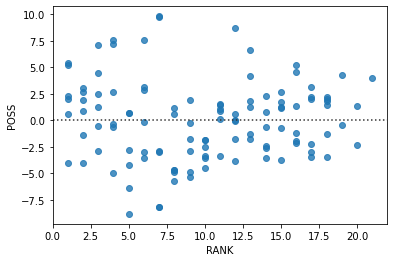

In [15]:
sns.residplot(x.RANK,y);

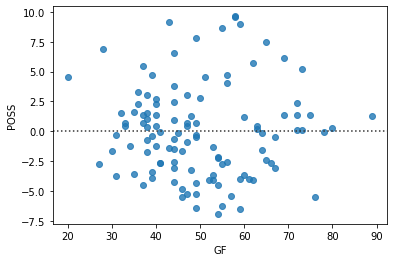

In [16]:
sns.residplot(x.GF,y);

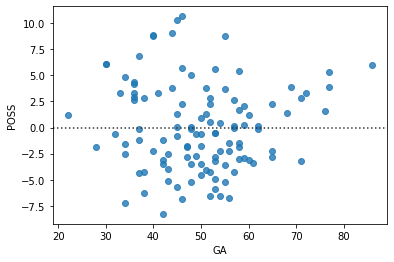

In [17]:
sns.residplot(x.GA,y);

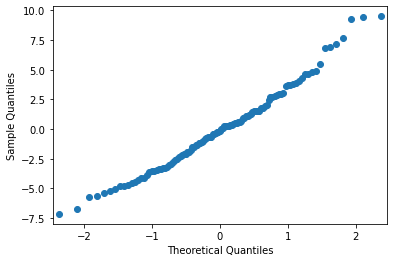

In [18]:
data = sm.datasets.longley.load()
model = sm.OLS(y, x)
fit  = model.fit()
res = fit.resid # residuals
fig = sm.qqplot(res)
plt.show()

#### Let's check and see if all of our data is within normal distribution

In [19]:
Super_Lig_z_scores= Super_Lig[["RANK","GF","GA","POSS"]].apply(stats.zscore)
Super_Lig_z_scores_3 = Super_Lig_z_scores[(Super_Lig_z_scores["RANK"]>2.5) |\
                                          (Super_Lig_z_scores["GF"]>2.5)|\
                                          (Super_Lig_z_scores["GA"]>2.5) |\
                                          (Super_Lig_z_scores["POSS"]>2.5)]
Super_Lig_z_scores_3

,RANK,GF,GA,POSS
24,-1.628669,2.986850,-0.511988,2.123061
87,1.462905,-2.277271,3.164101,-0.497196


#### There are two outlier data points in indeces 24 & 87. Let's drop those rows and rescore.

In [20]:
Super_Lig[87:88]

,RANK,TEAM,W,D,L,GF,GA,PTS,PL,AGE,POSS,SEASON,ATT,LEAGUE
87,18,Karabükspor,3,3,28,20,86,12,39,28.0,47.6,2018,"6,923",SUPER LIG


In [21]:
Super_Lig[24:25]

,RANK,TEAM,W,D,L,GF,GA,PTS,PL,AGE,POSS,SEASON,ATT,LEAGUE
24,1,Beşiktaş,26,6,8,89,44,84,29,27.6,60.5,2021,NaN,SUPER LIG


In [22]:
Super_Lig = Super_Lig.drop(Super_Lig.index[24])
Super_Lig = Super_Lig.drop(Super_Lig.index[87])
Super_Lig

,RANK,TEAM,W,D,L,GF,GA,PTS,PL,AGE,POSS,SEASON,ATT,LEAGUE
0,9,Adana Demirspor,15,10,13,60,47,55,34,27.6,48.8,2022,NaN,SUPER LIG
1,5,Alanyaspor,19,7,12,67,58,64,32,28.8,53.6,2022,NaN,SUPER LIG
2,18,Altay,9,7,22,39,57,34,30,28.4,44.1,2022,NaN,SUPER LIG
3,7,Antalyaspor,16,11,11,54,47,59,31,29.3,48.9,2022,NaN,SUPER LIG
4,4,Başakşehir,19,8,11,56,36,65,33,29.2,56.2,2022,NaN,SUPER LIG
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
108,15,Kayserispor,10,8,16,47,58,38,33,26.9,49.8,2017,"5,524",SUPER LIG
109,9,Konyaspor,11,10,13,40,45,43,26,27.0,50.4,2017,"15,723",SUPER LIG
110,13,Osmanlıspor,9,11,14,37,45,38,29,28.5,52.5,2017,"3,792",SUPER LIG
111,16,Rizespor,10,6,18,44,53,36,26,24.9,44.4,2017,"3,369",SUPER LIG


In [23]:
x = Super_Lig.drop(columns = ['TEAM','D','PL','SEASON','ATT','LEAGUE','POSS','AGE','W',\
                           'PTS','L'])
x = sm.add_constant(x)
y = Super_Lig['POSS']
model = sm.OLS(y,x, data = Super_Lig)
Super_Lig_model = model.fit()
Super_Lig_model.summary()

/home/dyedbird/anaconda3/envs/classification/lib/python3.8/site-packages/statsmodels/base/model.py:127: ValueWarning: unknown kwargs ['data']
  warnings.warn(msg, ValueWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   POSS   R-squared:                       0.472
Model:                            OLS   Adj. R-squared:                  0.457
Method:                 Least Squares   F-statistic:                     31.85
Date:                Fri, 17 Jun 2022   Prob (F-statistic):           8.56e-15
Time:                        00:20:18   Log-Likelihood:                -297.44
No. Observations:                 111   AIC:                             602.9
Df Residuals:                     107   BIC:                             613.7
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         49.6564      2.921     17.001      0.000      43.866      55.446
RANK          -0.1827      0.137     -1.332      0.186      -0.454       0.089
GF             0.1377      0.043      3.226      0.002       0.053       0.222
GA            -0.0931      0.048     -1.926      0.057      -0.189       0.003
==============================================================================
Omnibus:                        4.724   Durbin-Watson:                   1.902
Prob(Omnibus):                  0.094   Jarque-Bera (JB):                4.409
Skew:                           0.487   Prob(JB):                        0.110
Kurtosis:                       3.076   Cond. No.                         612.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Exclusion of outlier data from the model has decreased the R^2 value from .486 to .472. However, the p-value for RANK has improved from .236 to .186. We will stop here as the data is not large enough to validate and test but with this baseline modelling we have identified the features to include in our model. We have also confirmed linearity and dealth with multicollinearity and outlier data. However, we will keep the score as it is specific to Super Lig where the client's team is competing in. We will also note the out of expected place data points observed in the league which is indicative of other factors for a given team (i.e. poor management and/or coaching of the team) contributing to less than expected performance levels.

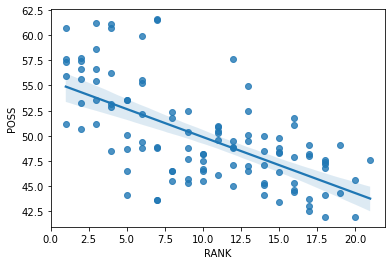

In [24]:
sns.regplot(x = "RANK",y = "POSS", data = Super_Lig, robust=True);

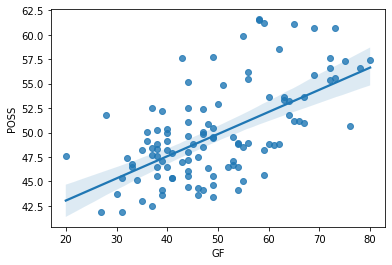

In [25]:
sns.regplot(x = "GF",y = "POSS", data = Super_Lig, robust=True);